In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

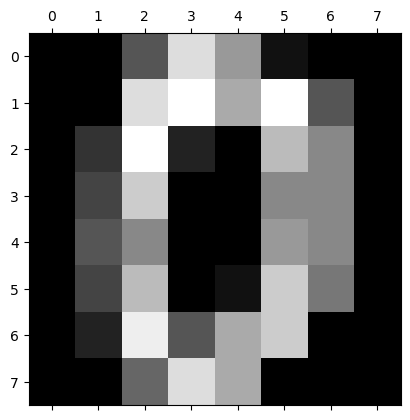

In [5]:
plt.gray()
plt.matshow(digits.images[0])

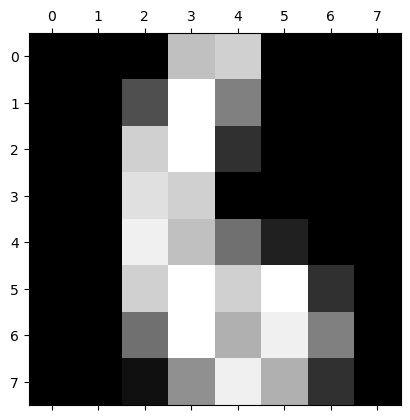

In [6]:
plt.matshow(digits.images[6])

In [7]:
import pandas as pd
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
target = digits.target

In [10]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
(x_train, x_test, y_train, y_test) = train_test_split(df, target, train_size = 0.8, random_state = 30)

In [14]:
len(x_train), len(x_test)

(1437, 360)

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [26]:
model.score(x_test, y_test)

0.9805555555555555

In [18]:
y_predicted = model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  1, 26]], dtype=int64)

In [29]:
import seaborn as sn

Text(58.222222222222214, 0.5, 'Truth')

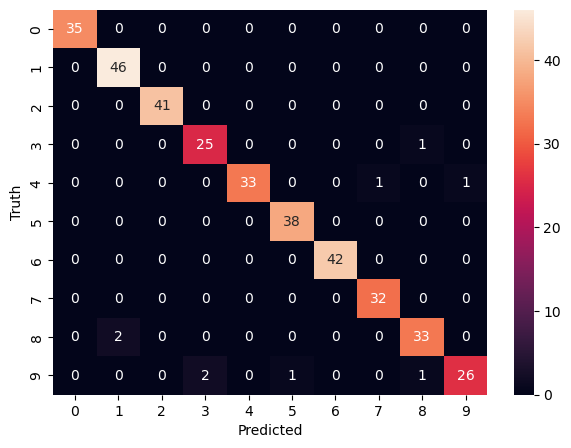

In [38]:
%matplotlib inline
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')